# AV Black Friday Dataset
## Import required libraries 

In [40]:
import pandas as pd
import seaborn as sns
%matplotlib inline

### Load train & test CSVs

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Check for missing values

In [42]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [43]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            161255 non-null float64
Product_Category_3            71037 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [44]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


### Looking for common value *to impute missing values with mode 

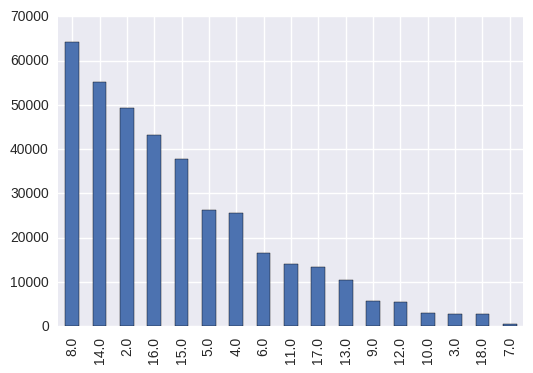

In [45]:
train['Product_Category_2'].value_counts().plot.bar()

## Using mode to impute missing values

In [46]:
# Train set
train['Product_Category_2'].fillna(train['Product_Category_2'].value_counts().index[0], inplace=True)
train['Product_Category_3'].fillna(train['Product_Category_3'].value_counts().index[0], inplace=True)
# Test set
test['Product_Category_2'].fillna(test['Product_Category_2'].value_counts().index[0], inplace=True)
test['Product_Category_3'].fillna(test['Product_Category_3'].value_counts().index[0], inplace=True)


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            550068 non-null float64
Product_Category_3            550068 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-null int64
Product_ID                    233599 non-null object
Gender                        233599 non-null object
Age                           233599 non-null object
Occupation                    233599 non-null int64
City_Category                 233599 non-null object
Stay_In_Current_City_Years    233599 non-null object
Marital_Status                233599 non-null int64
Product_Category_1            233599 non-null int64
Product_Category_2            233599 non-null float64
Product_Category_3            233599 non-null float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


### Convert object dtypes to numerical dtype for further computation

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
le = LabelEncoder()

### joining train & test 

In [68]:
df = pd.concat([train,test],axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


### Dropping Depended var

In [70]:
y = df['Purchase']
df.drop('Purchase', axis=1, inplace=True)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            783667 non-null float64
Product_Category_3            783667 non-null float64
Product_ID                    783667 non-null object
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 71.7+ MB


In [ ]:
col = df.

### Train-Test split 

In [29]:
from sklearn.model_selection import train_test_split

In [34]:
# y = train['Purchase']

In [35]:
train.drop('Purchase', axis=1, inplace=True)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.33, random_state=42)

In [66]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(368545, 11) (181523, 11) (368545,) (181523,)


### 1. SVM- Classifier 

In [38]:
from sklearn.svm import SVC
clf = SVC()